# Interpolation (Newton and Lagrange)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Data
x = np.array([1, 2, 4])
y = np.array([1, 4, 16])
new_dataX = np.linspace(0, 12, 10) # For the new X data 
n = x.shape[0]

## Newton Interpolation
We need divided difference table to calculate each coefficient. Then, we insert it to the formula:<br>
P(x) = $a_0$ + (newX-x) $a_1$ + (newX-x)(newX-x) $a_2$ + ....

In [196]:
# Newton
diffTable = np.zeros([n,n]) # Make matrix for divided difference table
diffTable[:,0] = y # Insert y to matrix (to get the coeff later)


# To calculate the coefficient, resulting from the divided difference table
def divTable(total):
    for i in range(1, total):
        for j in range(total - i):            
            diffTable[j][i] = (diffTable[j+1][i-1] - diffTable[0][i-1]) / (x[j+i] - x[i-1]) # Find the coefficient
    return diffTable[0, :] # Return only the 1st row which contains the coefficient


# To calculate the loop inside the newton function with the appropriate data (newdataX - x) 
def newtonLoop(i, x, newX):
    loop = 1
    for j in range(i):
        loop *= (newX - x[j])
    return loop
    

# Newton function
def newton(x, newX):
    coeff = divTable(n) # Pass the coefficient here
    newY = coeff[0] # The new y values that will be calculated, insert coeff[0] as the first coefficient (a0) 
     
    for i in range(1, n): # Loop starting from 1 because the 1st coefficient is already inserted
        newY += newtonLoop(i, x, newX) * coeff[i] # Call the loop everytime and multiply by the appropriate coefficient
    return newY
   
    
# Result
print("The new x data: ", new_dataX)
print("The new y data: ", newton(x, new_dataX))




The new x data:  [ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
  8.          9.33333333 10.66666667 12.        ]
The new y data:  [  0.           1.77777778   7.11111111  16.          28.44444444
  44.44444444  64.          87.11111111 113.77777778 144.        ]


## Lagrange Interpolation
Formula:
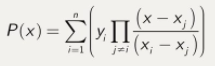

In [197]:
# Lagrange
def lagrange(x, y, newX):
    newY = 0.0 # Initial value of the newY
    for i in range(n):
        p = 1
        for j in range(n):
            # Keep on multiplying as long as i != j
            if i != j: 
                p *= ((newX - x[j]) / (x[i] - x[j]))
        # Add the results
        newY += p*y[i]
    return newY


# Result
print("The new x data: ", new_dataX)
print("The new y data: ", lagrange(x, y, new_dataX))

The new x data:  [ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
  8.          9.33333333 10.66666667 12.        ]
The new y data:  [-8.88178420e-16  1.77777778e+00  7.11111111e+00  1.60000000e+01
  2.84444444e+01  4.44444444e+01  6.40000000e+01  8.71111111e+01
  1.13777778e+02  1.44000000e+02]


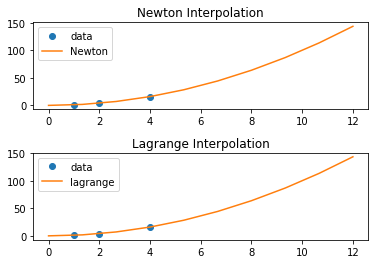

In [198]:
# Plotting the graph
fig = plt.figure()
fig.subplots_adjust(hspace=.5)

# Newton
ax = fig.add_subplot(2,1,1)
newton = newton(x, new_dataX)
ax.plot(x, y, 'o', label='data')
ax.plot(new_dataX, newton, label="Newton")
ax.set_title("Newton Interpolation")
ax.legend()

# Lagrange
ax2 = fig.add_subplot(2,1,2)
lagrange = lagrange(x, y, new_dataX)
ax2.plot(x, y, 'o', label='data')
ax2.plot(new_dataX, lagrange, label='lagrange')
ax2.set_title("Lagrange Interpolation")
ax2.legend()